In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import os
import copy

# os.chdir('/content/drive/MyDrive/Colab Notebooks/Shashank')

# os.chdir('/Users/shashanksule/Documents/TMDmaps')
# Regular Modules
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
import datetime
import scipy.integrate as scint
#from numpy.random import default_rng
import numpy.ma as ma
import matplotlib.tri as tri
import scipy.io
import time 
from mpl_toolkits.mplot3d import axes3d
# parallelization modules 

from math import nan
from joblib import Parallel, delayed
import multiprocessing
import itertools



In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

# Load data

In [11]:
gibbs_data = np.load(os.getcwd()+ "/sim_jan24/muller_gibbs.npy", allow_pickle=True).item()
args = gibbs_data['args']
results = gibbs_data['sim_results']
errors = results['error_tensor'][:,:,0,0]
sestimates = results['singer_estimates'][:,:,0,0]
# pw_errors = results['PW_error'][:,:,0,0]
N_pts = results['N_points'][:,:,0,0]

## Committor RMS

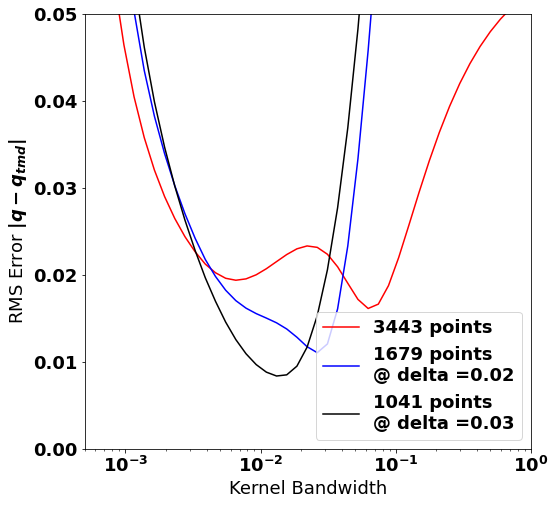

In [26]:
fig, ax3 = plt.subplots(figsize = (8,8))
colors_FEM = iter(plt.cm.jet(np.linspace(0,1,3)))
colors_FEM = iter(["Red", "Blue", "Black", "Green", "Purple"])
ax3.set(xscale = "log")
for j in range(3):
    i = j+1
    if j == 0:
        color = next(colors_FEM)
        ax3.plot(args['epsilons'], errors[:,i], 
                 color = color,
                 # lw = 2.5,
                 label = str(int(N_pts[0,i])) + " points")
    else:
        color = next(colors_FEM)
        ax3.plot(args['epsilons'], errors[:,i], 
                 color = color,
                 # lw = 2.5,
                 label = str(int(int(N_pts[0,i]))) + " points \n@ delta =" + str(round(args['deltas'][i],2)))

ax3.legend(loc = 'best')
ax3.set(ylim = (0.0,0.05))
ax3.set(xlim = (5*1e-4, 1.0))
#ax3.set(title = "Errors on metadynamics density \n(Muller)")
ax3.set(ylabel = "RMS Error $\|q-q_{tmd}\|$", xlabel = "Kernel Bandwidth");
fig.savefig("q_errors.pdf", bbox_inches="tight")

## Singer's estimates

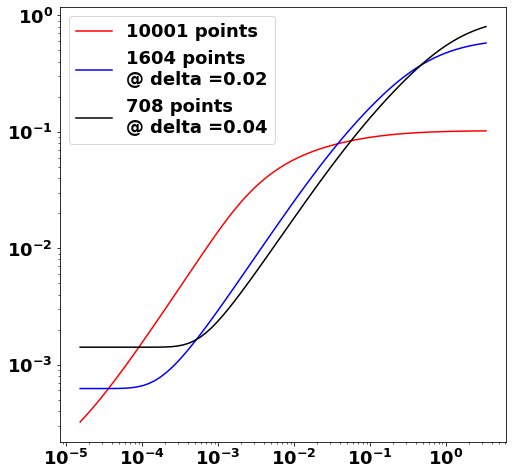

In [26]:
fig, ax4 = plt.subplots(figsize = (8,8))
colors_FEM = iter(plt.cm.jet(np.linspace(0,1,3)))
colors_FEM = iter(["Red", "Blue", "Black", "Green", "Purple"])
ax4.set(xscale = "log")
ax4.set(yscale = "log")
for j in range(3):
    i=2*j 
    if j == 0:
        color = next(colors_FEM)
        ax4.plot(args['epsilons'], sestimates[:,i], 
                 color = color,
                 # lw = 2.5,
                 label = str(int(N_pts[0,i])) + " points")
    else:
        color = next(colors_FEM)
        ax4.plot(args['epsilons'], sestimates[:,i], 
                 color = color,
                 # lw = 2.5,
                 label = str(int(int(N_pts[0,i]))) + " points \n@ delta =" + str(round(args['deltas'][i],2)))

ax4.legend(loc = 'best')
# ax4.set(ylim = (5*1e-3,0.3))
# ax4.set(xlim = (0.0, 1.0))
# ax4.set(title = "sestimates on metadynamics density \n(Muller)")
# ax4.set(ylabel = "RMS Error", xlabel = "Kernel Bandwidth");

## P.W. errors

[(0.0005, 0.02)]

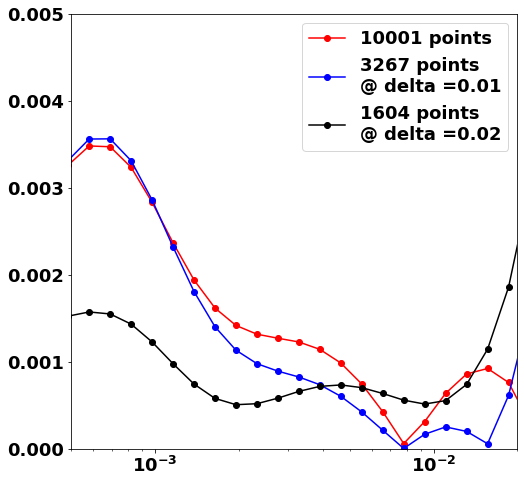

In [35]:
fig, ax4 = plt.subplots(figsize = (8,8))
colors_FEM = iter(plt.cm.jet(np.linspace(0,1,3)))
colors_FEM = iter(["Red", "Blue", "Black", "Green", "Purple"])
ax4.set(xscale = "log")
# ax4.set(yscale = "log")
for j in range(3):
    i=j 
    if j == 0:
        color = next(colors_FEM)
        ax4.plot(args['epsilons'], pw_errors[:,i], 
                 color = color,
                 marker = 'o',
                 # lw = 2.5,
                 label = str(int(N_pts[0,i])) + " points")
    else:
        color = next(colors_FEM)
        ax4.plot(args['epsilons'], pw_errors[:,i], 
                 color = color,
                 marker = 'o',
                 # lw = 2.5,
                 label = str(int(int(N_pts[0,i]))) + " points \n@ delta =" + str(round(args['deltas'][i],2)))

ax4.legend(loc = 'best')
ax4.set(ylim = (0.0,5*1e-3))
ax4.set(xlim = (0.5*1e-3, 2*1e-2))
# ax4.set(title = "pw_errors on metadynamics density \n(Muller)")
# ax4.set(ylabel = "RMS Error", xlabel = "Kernel Bandwidth");

## Comparison 

In [47]:
gibbs_data = np.load(os.getcwd()+ "/sim_feb6/muller_gibbs.npy", allow_pickle=True).item()
metad_data = np.load(os.getcwd()+ "/sim_feb6/muller_metadynamics.npy", allow_pickle=True).item()
unif_data = np.load("muller_uniform.npy", allow_pickle=True).item()
full_data = {"gibbs": gibbs_data, "metadynamics": metad_data, "uniform": unif_data}

/var/folders/nz/g2p2__rs0zg08cf91bxn73lr0000gn/T/ipykernel_4935/3472223325.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set(xlim = (0.0, 1.0))


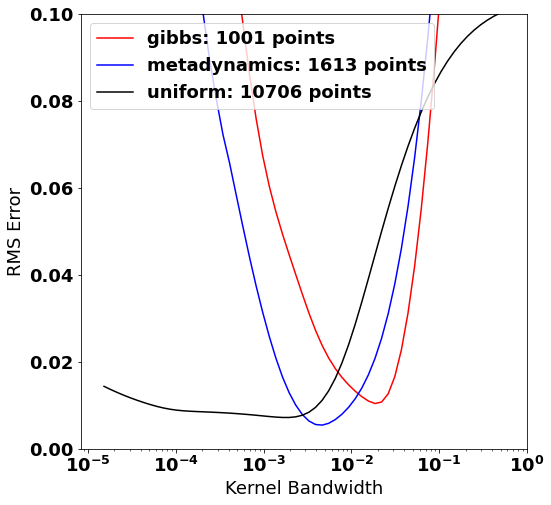

In [59]:
fig, ax3 = plt.subplots(figsize = (8,8))
colors_FEM = iter(plt.cm.jet(np.linspace(0,1,3)))
colors_FEM = iter(["Red", "Blue", "Black", "Green", "Purple"])
ax3.set(xscale = "log")
names = ["gibbs", "metadynamics", "uniform"]
for i in range(3):
    current = full_data[names[i]]
    j = 3
    if names[i] == "uniform":
        j = 0
    color = next(colors_FEM)
    args = current['args']
    errors = current['sim_results']['error_tensor'][:,:,0,0]
    N_pts = current['sim_results']['N_points'][:,:,0,0]
    ax3.plot(args['epsilons'], errors[:,j], 
                 color = color,
                 # lw = 2.5,
                 # label = str(int(N_pts[0,0])) + " points"
                 label = names[i] + ": " + str(int(N_pts[0,j])) + " points")

ax3.legend(loc = 'best')
ax3.set(ylim = (0.0, 1e-1))
ax3.set(xlim = (0.0, 1.0))
#ax3.set(title = "Errors on metadynamics density \n(Muller)")
ax3.set(ylabel = "RMS Error", xlabel = "Kernel Bandwidth");